<a href="https://colab.research.google.com/github/jiho4399/contests/blob/master/%EC%B9%98%EC%95%88%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B3%B5%EB%AA%A8%EC%A0%84/code/05_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 재시작 해야함!!!!!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/contest/AF_contest/data/'

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# !pip install geopandas
# import geopandas as gpd
# from pyproj.crs import CRS
# from shapely.geometry import Polygon

# from datetime import datetime
# !pip install pytimekr
# from pytimekr import pytimekr

import requests
from urllib.parse import urlparse

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

plt.rc('font', family='NanumBarunGothic')
# plt.rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

# 데이터 추가 전처리

In [ ]:
data['RPTER_SEX'].unique()

array(['1', '3', '2', '{', ' ', 2.0, 1.0, 3.0], dtype=object)

In [ ]:
data.loc[data['RPTER_SEX'] == 1, 'RPTER_SEX'] = 1
data.loc[data['RPTER_SEX'] == 2, 'RPTER_SEX'] = 2
data.loc[data['RPTER_SEX'] == 3, 'RPTER_SEX'] = 3
data.loc[data['RPTER_SEX'] == '1', 'RPTER_SEX'] = 1
data.loc[data['RPTER_SEX'] == '2', 'RPTER_SEX'] = 2
data.loc[data['RPTER_SEX'] == '3', 'RPTER_SEX'] = 3
data.loc[data['RPTER_SEX'] == '{', 'RPTER_SEX'] = 3
data.loc[data['RPTER_SEX'] == ' ', 'RPTER_SEX'] = 3

In [ ]:
data['RPTER_SEX'].unique()

array([1, 3, 2])

In [ ]:
data['SME_EVT_YN'].unique()

array(['Y', nan, 'C', 'N', ' '], dtype=object)

In [ ]:
data.loc[data['SME_EVT_YN'] == 'C', 'SME_EVT_YN'] = 'Y'
data.loc[data['SME_EVT_YN'] == ' ', 'SME_EVT_YN'] = 'N'
data.loc[data['SME_EVT_YN'].isna(), 'SME_EVT_YN'] = 'N'

In [ ]:
data['SME_EVT_YN'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
data = data[(data['HPPN_Y'] <= 37.064875) & (data['HPPN_Y'] >= 35.980667) & (data['HPPN_X'] <= 127.639522) & (data['HPPN_X'] >= 125.955514)]

In [ ]:
data.to_csv(path + 'data_1/xy_d1_add1.csv', index = False)

# 시각화

In [ ]:
data = pd.read_csv(path + 'data_1/xy_d1_add1.csv')
data

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,...,MINUTE,SECOND,CLEAN_ADDR,HOUR_CAT,SEASON,DATE,HOLIDAY,SEOLLAL,CHUSEOK,WEEK_DAY
0,19,10,406,1,충청남도 공주시 정안면 어물리(정안면) 33-2,127.148714,36.605751,Y,20,1,...,3,11,충청남도 공주시 정안면 어물리 33-2,DAWN,WINTER,2020-01-01,1,0,0,WED
1,19,10,403,1,충청남도 논산시 채운면 장화리(채운면) 533,127.030921,36.164643,N,20,1,...,18,8,충청남도 논산시 채운면 장화리 533,DAWN,WINTER,2020-01-01,1,0,0,WED
2,19,10,406,1,세종특별자치시 세종시 소담동(소담동) 32-92,127.305511,36.479819,Y,20,1,...,20,1,세종특별자치시 세종시 소담동 32-92,DAWN,WINTER,2020-01-01,1,0,0,WED
3,19,10,402,1,충청남도 천안시 서북구 불당동(불당동) 204-4,127.109667,36.815468,N,20,1,...,20,4,충청남도 천안시 서북구 불당동 204-4,DAWN,WINTER,2020-01-01,1,0,0,WED
4,13,10,401,1,대전광역시 유성구 봉명동(행정:온천1동) 541-26,127.348625,36.353829,N,20,1,...,21,35,대전광역시 유성구 봉명동 541-26,DAWN,WINTER,2020-01-01,1,0,0,WED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403510,19,10,406,1,충남 천안시 동남구 신부동 320-39,127.152785,36.822255,N,23,1,...,14,52,충남 천안시 동남구 신부동 320-39,NIGH,WINTER,2023-11-08,0,0,0,WED
403511,13,10,406,1,대전광역시 중구 문화동 (행정:문화1동 ) 1-266,127.414486,36.321280,Y,23,1,...,21,42,대전광역시 중구 문화동 1-266,NIGH,WINTER,2023-11-08,0,0,0,WED
403512,19,10,401,1,충청남도 당진시 신평면 상오리(신평면 ) 910-6,126.741950,36.868136,Y,23,1,...,32,32,충청남도 당진시 신평면 상오리 910-6,NIGH,WINTER,2023-11-08,0,0,0,WED
403513,13,10,406,2,대전광역시 서구 월평동 (월평1동 ) 1526,127.357785,36.355010,N,23,1,...,35,52,대전광역시 서구 월평동 1526,NIGH,WINTER,2023-11-08,0,0,0,WED


## 범주 count

### 교통사고 유형별
- 401 : 교통사고
- 402 : 교통불편
- 403 : 교통위반
- 404 : 사망/대형사고
- 405 : 인피도주
- 406 : 음주운전

**교통사고, 음주운전, 교통불편, 교통위반, 인피도주, 사망/대형사고 순으로 많이 발견됨**

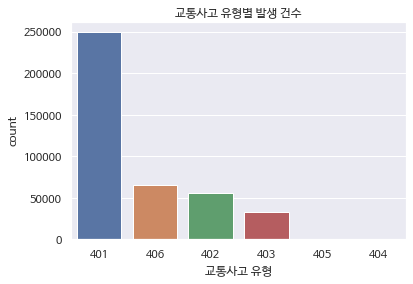

In [ ]:
sns.countplot(x = 'EVT_CL_CD', data = data, order = data['EVT_CL_CD'].value_counts().index)
plt.title('교통사고 유형별 발생 건수')
plt.xlabel('교통사고 유형')
plt.show()

In [ ]:
data['EVT_CL_CD'].value_counts()

401    249236
406     65078
402     56017
403     33118
405        46
404        20
Name: EVT_CL_CD, dtype: int64

### 신고자 성별

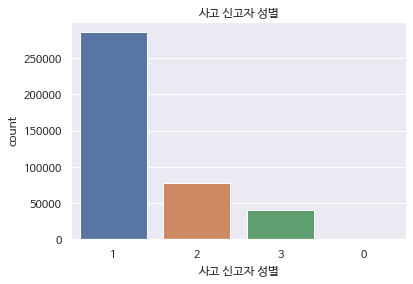

In [ ]:
sns.countplot(x = 'RPTER_SEX', data = data, order = data['RPTER_SEX'].value_counts().index)
plt.title('사고 신고자 성별')
plt.xlabel('사고 신고자 성별')
plt.show()

In [ ]:
data['RPTER_SEX'].value_counts()

1    285708
2     77080
3     40718
0         9
Name: RPTER_SEX, dtype: int64

### NPA_CL

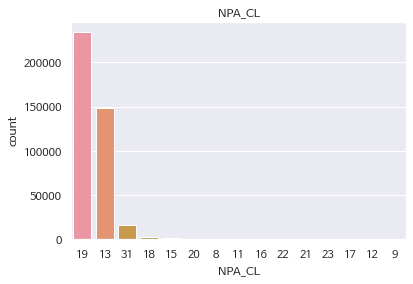

In [ ]:
sns.countplot(x = 'NPA_CL', data = data, order = data['NPA_CL'].value_counts().index)
plt.title('NPA_CL')
plt.xlabel('NPA_CL')
plt.show()


In [ ]:
data['NPA_CL'].value_counts()

19    234031
13    148949
31     15964
18      2211
15      1689
20       546
8         44
11        40
16        18
22         6
21         5
23         5
17         3
12         2
9          2
Name: NPA_CL, dtype: int64

### 중복 접수

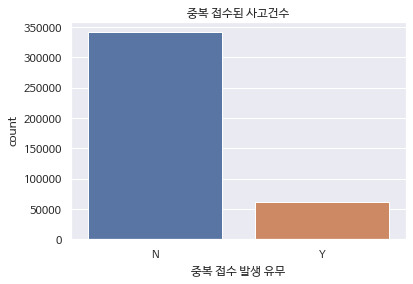

In [ ]:
sns.countplot(x = 'SME_EVT_YN', data = data, order = data['SME_EVT_YN'].value_counts().index)
plt.title('중복 접수된 사고건수')
plt.xlabel('중복 접수 발생 유무')
plt.show()

In [ ]:
data['SME_EVT_YN'].value_counts()

N    341302
Y     62213
Name: SME_EVT_YN, dtype: int64

### 월

**9월10월(가을), 7월8월(여름), 겨울 및 봄으로 사고가 많이 일어남**

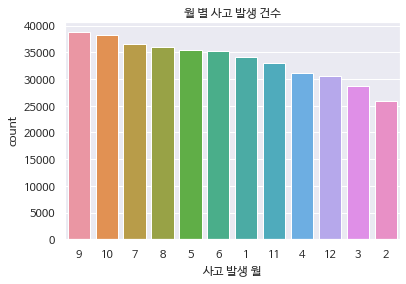

In [ ]:
sns.countplot(x = 'MONTH', data = data, order = data['MONTH'].value_counts().index)
plt.title('월 별 사고 발생 건수')
plt.xlabel('사고 발생 월')
plt.show()

In [ ]:
data['MONTH'].value_counts()

9     38757
10    38227
7     36580
8     36065
5     35416
6     35157
1     34046
11    33070
4     31122
12    30566
3     28695
2     25814
Name: MONTH, dtype: int64

### 시간

**오후, 저녁, 밤 순으로 사고가 많이 일어남**

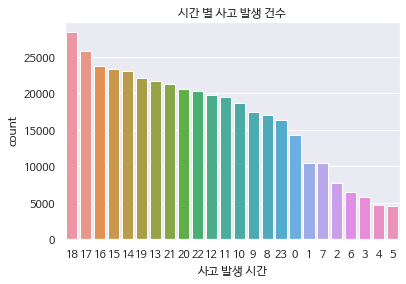

In [ ]:
sns.countplot(x = 'HOUR', data = data, order = data['HOUR'].value_counts().index)
plt.title('시간 별 사고 발생 건수')
plt.xlabel('사고 발생 시간')
plt.show()

In [ ]:
data['HOUR'].value_counts()

18    28368
17    25753
16    23744
15    23286
14    23033
19    22133
13    21681
21    21338
20    20635
22    20325
12    19752
11    19461
10    18638
9     17403
8     16961
23    16357
0     14304
1     10497
7     10488
2      7739
6      6531
3      5808
4      4691
5      4589
Name: HOUR, dtype: int64

### 요일

**토요일, 금요일에 많이 일어남**

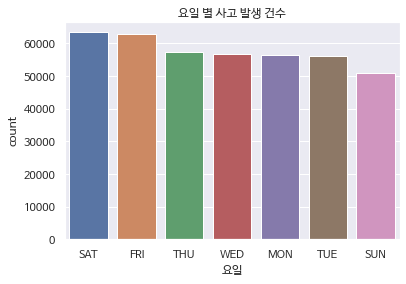

In [ ]:
sns.countplot(x = 'WEEK_DAY', data = data, order = data['WEEK_DAY'].value_counts().index)
plt.title('요일 별 사고 발생 건수')
plt.xlabel('요일')
plt.show()

In [ ]:
data['WEEK_DAY'].value_counts()

SAT    63334
FRI    62823
THU    57433
WED    56705
MON    56223
TUE    56202
SUN    50795
Name: WEEK_DAY, dtype: int64

### 시간대

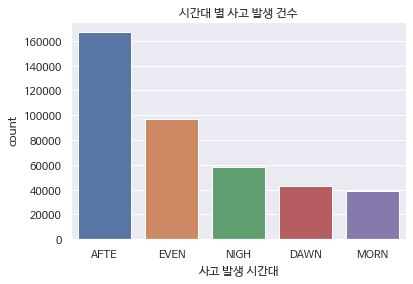

In [ ]:
sns.countplot(x = 'HOUR_CAT', data = data, order = data['HOUR_CAT'].value_counts().index)
plt.title('시간대 별 사고 발생 건수')
plt.xlabel('사고 발생 시간대')
plt.show()

In [ ]:
data['HOUR_CAT'].value_counts()

AFTE    166998
EVEN     96889
NIGH     58020
DAWN     43039
MORN     38569
Name: HOUR_CAT, dtype: int64

### 계절

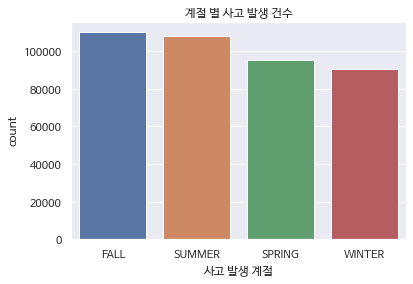

In [ ]:
sns.countplot(x = 'SEASON', data = data, order = data['SEASON'].value_counts().index)
plt.title('계절 별 사고 발생 건수')
plt.xlabel('사고 발생 계절')
plt.show()

In [ ]:
data['SEASON'].value_counts()

FALL      110054
SUMMER    107802
SPRING     95233
WINTER     90426
Name: SEASON, dtype: int64

### 공휴일

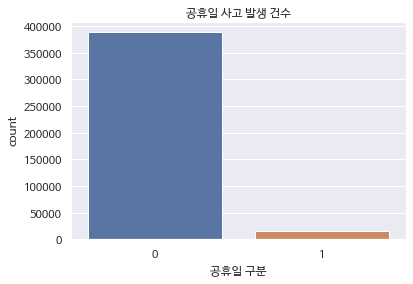

In [ ]:
# 의미 없을듯
sns.countplot(x = 'HOLIDAY', data = data, order = data['HOLIDAY'].value_counts().index)
plt.title('공휴일 사고 발생 건수')
plt.xlabel('공휴일 구분')
plt.show()

In [ ]:
data['HOLIDAY'].value_counts()

0    388682
1     14833
Name: HOLIDAY, dtype: int64

### 설날

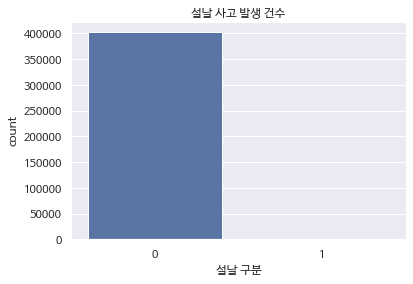

In [ ]:
# 의미 없을듯
sns.countplot(x = 'SEOLLAL', data = data, order = data['SEOLLAL'].value_counts().index)
plt.title('설날 사고 발생 건수')
plt.xlabel('설날 구분')
plt.show()

In [ ]:
data['SEOLLAL'].value_counts()

0    402046
1      1469
Name: SEOLLAL, dtype: int64

### 추석

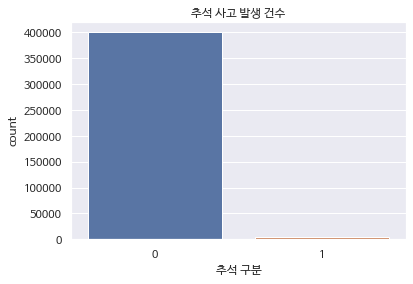

In [ ]:
# 의미 없을듯
sns.countplot(x = 'CHUSEOK', data = data, order = data['CHUSEOK'].value_counts().index)
plt.title('추석 사고 발생 건수')
plt.xlabel('추석 구분')
plt.show()

## 요일별 시간

**각 요일에 오후, 저녁, 밤 순으로 많이 발생**

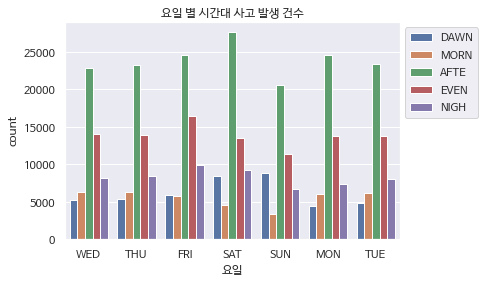

In [ ]:
sns.countplot(x = 'WEEK_DAY', data = data, hue="HOUR_CAT")
plt.title('요일 별 시간대 사고 발생 건수')
plt.xlabel('요일')
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.show()

In [ ]:
pd.crosstab(data["HOUR_CAT"],data["WEEK_DAY"])

WEEK_DAY,FRI,MON,SAT,SUN,THU,TUE,WED
HOUR_CAT,,,,,,,
AFTE,24627,24605,27639,20570,23284,23432,22841
DAWN,5943,4432,8390,8797,5373,4829,5275
EVEN,16489,13778,13492,11329,13970,13739,14092
MORN,5793,6049,4524,3435,6329,6170,6269
NIGH,9971,7359,9289,6664,8477,8032,8228


## 계절별 시간대

**각 계절에 오후, 저녁, 밤 순으로 발생**

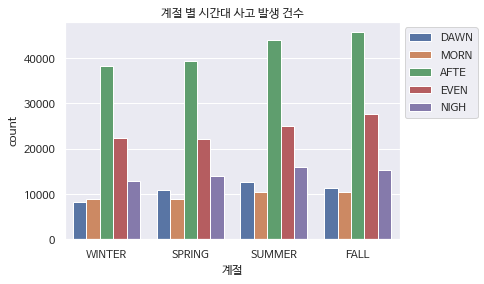

In [ ]:
sns.countplot(x = 'SEASON', data = data, hue="HOUR_CAT")
plt.title('계절 별 시간대 사고 발생 건수')
plt.xlabel('계절')
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.show()

In [ ]:
pd.crosstab(data["HOUR_CAT"],data["SEASON"])

SEASON,FALL,SPRING,SUMMER,WINTER
HOUR_CAT,,,,
AFTE,45623,39212,43922,38241
DAWN,11271,10962,12590,8216
EVEN,27571,22136,24879,22303
MORN,10404,8954,10422,8789
NIGH,15185,13969,15989,12877


## 월별 시간대

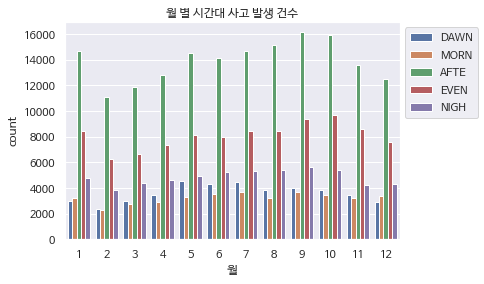

In [ ]:
sns.countplot(x = 'MONTH', data = data, hue="HOUR_CAT")
plt.title('월 별 시간대 사고 발생 건수')
plt.xlabel('월')
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.show()

In [ ]:
pd.crosstab(data["HOUR_CAT"],data["MONTH"])

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
HOUR_CAT,,,,,,,,,,,,
AFTE,14670,11099,11879,12824,14509,14112,14666,15144,16134,15911,13578,12472
DAWN,2947,2362,3000,3431,4531,4302,4449,3839,3960,3831,3480,2907
EVEN,8471,6264,6658,7325,8153,7976,8435,8468,9349,9665,8557,7568
MORN,3195,2247,2760,2887,3307,3524,3682,3216,3698,3455,3251,3347
NIGH,4763,3842,4398,4655,4916,5243,5348,5398,5616,5365,4204,4272


## 유형별 계절

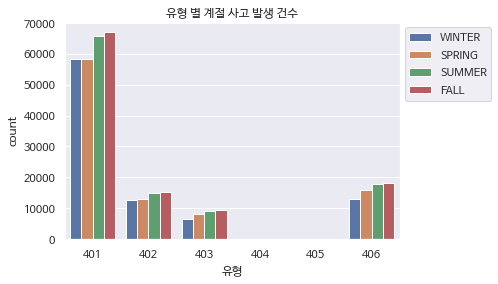

In [ ]:
sns.countplot(x = 'EVT_CL_CD', data = data, hue="SEASON")
plt.title('유형 별 계절 사고 발생 건수')
plt.xlabel('유형')
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.show()

In [ ]:
pd.crosstab(data["SEASON"],data["EVT_CL_CD"])

EVT_CL_CD,401,402,403,404,405,406
SEASON,,,,,,
FALL,66930,15358,9424,5,9,18328
SPRING,58327,12919,8075,3,13,15896
SUMMER,65630,15121,9122,6,12,17911
WINTER,58349,12619,6497,6,12,12943


## 유형별 월

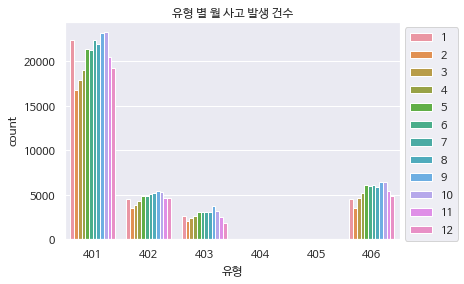

In [ ]:
sns.countplot(x = 'EVT_CL_CD', data = data, hue="MONTH")
plt.title('유형 별 월 사고 발생 건수')
plt.xlabel('유형')
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.show()

In [ ]:
pd.crosstab(data["MONTH"],data["EVT_CL_CD"])

EVT_CL_CD,401,402,403,404,405,406
MONTH,,,,,,
1,22386,4491,2611,1,6,4551
2,16765,3488,2072,1,3,3485
3,17885,3814,2379,0,6,4611
4,19062,4271,2635,2,2,5150
5,21380,4834,3061,1,5,6135
6,21252,4906,3015,2,5,5977
7,22397,5048,3045,3,3,6084
8,21981,5167,3062,1,4,5850
9,23180,5396,3745,1,0,6435


## 유형별 시간대
- 401 : 교통사고
- 402 : 교통불편
- 403 : 교통위반
- 404 : 사망/대형사고
- 405 : 인피도주
- 406 : 음주운전

**이게 의미있어보임**
- 401 : 교통사고 : 오후, 저녁, 밤 순서
- 402 : 교통불편 : 오후, 저녁, 아침 순서
- 403 : 교통위반 : 오후, 저녁, 밤 순서
- 404 : 사망/대형사고 : 오후, 밤, 저녁 순서
- 405 : 인피도주 : 새벽, 저녁, 오후 순서
- 406 : 음주운전 : 밤, 새벽, 저녁 순서

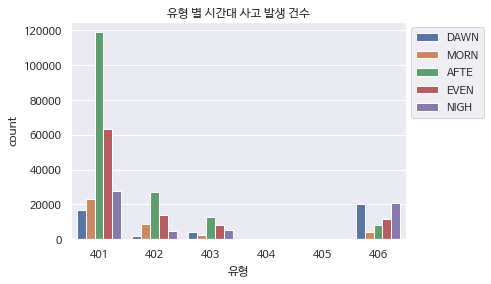

In [ ]:
sns.countplot(x = 'EVT_CL_CD', data = data, hue="HOUR_CAT")
plt.title('유형 별 시간대 사고 발생 건수')
plt.xlabel('유형')
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.show()

In [ ]:
pd.crosstab(data["HOUR_CAT"],data["EVT_CL_CD"])

EVT_CL_CD,401,402,403,404,405,406
HOUR_CAT,,,,,,
AFTE,118693,27199,13015,8,10,8073
DAWN,16601,2055,3910,1,13,20459
EVEN,63116,13666,8421,4,12,11670
MORN,23303,8616,2458,2,2,4188
NIGH,27523,4481,5314,5,9,20688


## 유형별 성별

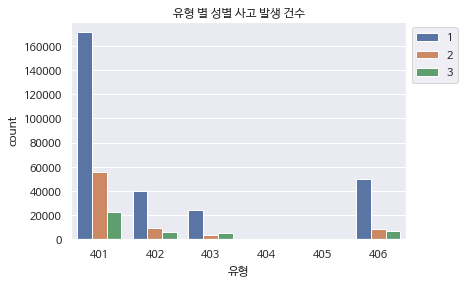

In [ ]:
sns.countplot(x = 'EVT_CL_CD', data = data, hue="RPTER_SEX")
plt.title('유형 별 성별 사고 발생 건수')
plt.xlabel('유형')
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.show()

In [ ]:
pd.crosstab(data["RPTER_SEX"],data["EVT_CL_CD"])

EVT_CL_CD,401,402,403,404,405,406
RPTER_SEX,,,,,,
1,171289,40346,24071,9,25,49968
2,55539,9384,3666,5,15,8471
3,22408,6287,5381,6,6,6639


## 유형별 요일
- 401 : 교통사고
- 402 : 교통불편
- 403 : 교통위반
- 404 : 사망/대형사고
- 405 : 인피도주
- 406 : 음주운전

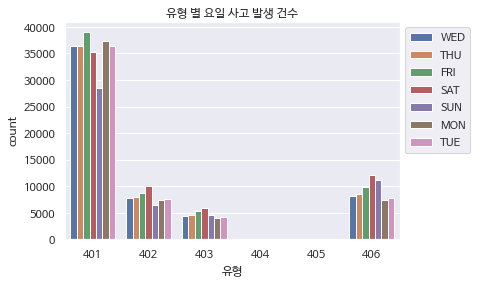

In [ ]:
sns.countplot(x = 'EVT_CL_CD', data = data, hue="WEEK_DAY")
plt.title('유형 별 요일 사고 발생 건수')
plt.xlabel('유형')
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.show()

In [ ]:
pd.crosstab(data["WEEK_DAY"],data["EVT_CL_CD"])

EVT_CL_CD,401,402,403,404,405,406
WEEK_DAY,,,,,,
FRI,38993,8628,5262,3,7,9930
MON,37422,7386,4024,5,5,7381
SAT,35283,10034,5837,4,4,12172
SUN,28458,6528,4631,4,5,11169
THU,36309,8010,4665,0,7,8442
TUE,36467,7649,4219,3,7,7857
WED,36304,7782,4480,1,11,8127
